# Analisis de resultados del WebScraping.

### Librerias:

In [37]:
import os
import re
import Keys
import nltk #procesamiento de lenguaje natural
import openai
import folium
import unidecode
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from geopy.geocoders import GoogleV3
from nltk.tokenize import word_tokenize #Separa la frase en "Tokens"
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to /home/negro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/negro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/negro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Carga de archivos

Se cargan los dataframes diferentes y se unen para visualizar su contenido, realizar modificaciones necesarias y proceder a agruparlos una vez validemos que estan bien sus datos y estructura.

In [38]:
df_Categorias = pd.read_csv("./categorias.csv") # Se cargan el dataframe con las categorias establecidas.

In [39]:
# Directorio que contiene los archivos CSV
directorio = './Resultados'

#Se excluirá el df_final
archivo_excluido = "df_final.csv"

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Itera a través de los archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith(".csv") and filename != archivo_excluido:
        # Lee el archivo CSV y conviértelo en un DataFrame
        path = os.path.join(directorio, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

# Combina los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

### Visualizar archivos

visualizamos su contenido y estructura para conocer más de cerca cada uno de los archivos

In [40]:
df

title   
0     Aprendiz Universitario en Ingeniería de Sistem...  \
1     Aprendiz Universitario en Ingeniería de Sistem...   
2     Aprendiz Universitario en Ingeniería de Softwa...   
3     Aprendiz Universitario en Ingeniería de Sistem...   
4     Aprendiz Universitario en Ingeniería de Sistem...   
...                                                 ...   
3045                                         Jefe de TI   
3046                  Analista seguridad TI (monitoreo)   
3047                                  Analista contable   
3048                     Docente de Redes e Informática   
3049  Profesores/as en Informática y Tecnología Clas...   

                                      location   
0                                     Colombia  \
1                                     Colombia   
2                                     Colombia   
3                                     Colombia   
4                                     Colombia   
...                                        ...   
3045          La Estrella, Antioquia, Colombia   
3046             Medellin, Antioquia, Colombia   
3047  Bogota, D.C., Capital District, Colombia   
3048  Bogota, D.C., Capital District, Colombia   
3049  Bogota, D.C., Capital District, Colombia   

                              company  
0                         Bancolombia  
1                         Bancolombia  
2                         Bancolombia  
3                         Bancolombia  
4                         Bancolombia  
...                               ...  
3045  Milagros Enterprise Group S.A.S  
3046                    POSTOBON S.A.  
3047           Tecnología Informática  
3048                 Educación Futuro  
3049                    Apprentus Ltd  

[3050 rows x 3 columns]

### Duplicados

In [41]:
df.drop_duplicates()

title   
0     Aprendiz Universitario en Ingeniería de Sistem...  \
1     Aprendiz Universitario en Ingeniería de Sistem...   
2     Aprendiz Universitario en Ingeniería de Softwa...   
3     Aprendiz Universitario en Ingeniería de Sistem...   
4     Aprendiz Universitario en Ingeniería de Sistem...   
...                                                 ...   
2917                                       Engineer ETL   
2963                          Coordinador de Calidad TI   
2995  Jefe de tecnología experiencia en transformaci...   
3033                       Auxiliar de soporte técnico   
3045                                         Jefe de TI   

                                      location   
0                                     Colombia  \
1                                     Colombia   
2                                     Colombia   
3                                     Colombia   
4                                     Colombia   
...                                        ...   
2917  Bogota, D.C., Capital District, Colombia   
2963  Bogota, D.C., Capital District, Colombia   
2995     Candelaria, Valle del Cauca, Colombia   
3033             Medellín, Antioquia, Colombia   
3045          La Estrella, Antioquia, Colombia   

                              company  
0                         Bancolombia  
1                         Bancolombia  
2                         Bancolombia  
3                         Bancolombia  
4                         Bancolombia  
...                               ...  
2917          NTT DATA Europe & Latam  
2963                    Cafam Oficial  
2995      Soluciones Inmediatas S.A.S  
3033                    E-Global S.A.  
3045  Milagros Enterprise Group S.A.S  

[297 rows x 3 columns]

### Nulos

Validamos si poseen datos nulos en cada uno de los dataframe

In [42]:
df.isnull().sum()

title       0
location    0
company     0
dtype: int64

### Transformaciones:

In [43]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula
df_Categorias = df_Categorias.applymap(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula

In [44]:
# Función para aplicar limpieza a cada celda del DataFrame
def limpiar_celda(celda):
    if isinstance(celda, str):
        # Eliminar caracteres que no sean letras o espacios en blanco
        celda = re.sub(r'[^\w\s]', '', celda)
        # Eliminar números
        celda = re.sub(r'\d+', '', celda)
        # Remover acentos y caracteres especiales
        celda = unidecode(celda)
    return celda


In [45]:
# Se aplicar limpieza a cada celda del DataFrame
df = df.applymap(limpiar_celda)
df_Categorias = df_Categorias.applymap(limpiar_celda)

In [46]:
df

title   
0     aprendiz universitario en ingenieria de sistem...  \
1     aprendiz universitario en ingenieria de sistem...   
2     aprendiz universitario en ingenieria de softwa...   
3     aprendiz universitario en ingenieria de sistem...   
4     aprendiz universitario en ingenieria de sistem...   
...                                                 ...   
3045                                         jefe de ti   
3046                    analista seguridad ti monitoreo   
3047                                  analista contable   
3048                     docente de redes e informatica   
3049  profesoresas en informatica y tecnologia clase...   

                                 location                        company  
0                                colombia                    bancolombia  
1                                colombia                    bancolombia  
2                                colombia                    bancolombia  
3                                colombia                    bancolombia  
4                                colombia                    bancolombia  
...                                   ...                            ...  
3045       la estrella antioquia colombia  milagros enterprise group sas  
3046          medellin antioquia colombia                    postobon sa  
3047  bogota dc capital district colombia         tecnologia informatica  
3048  bogota dc capital district colombia               educacion futuro  
3049  bogota dc capital district colombia                  apprentus ltd  

[3050 rows x 3 columns]

- Agrupar por titulos

In [47]:
df_por_ubicación = df.groupby('location')['title'].nunique().reset_index()

In [48]:
print(df_por_ubicación)

                                        location  title
0                             antioquia colombia      1
1                     barbosa antioquia colombia      1
2                barranquilla atlantico colombia     11
3                       bello antioquia colombia      2
4            bogota dc capital district colombia    106
5                 bucaramanga santander colombia      2
6                  cali valle del cauca colombia     15
7            candelaria valle del cauca colombia      1
8                      capital district colombia      1
9                     cartagena bolivar colombia      1
10                    cocorna antioquia colombia      1
11                                      colombia     34
12              comuna   estadio tolima colombia      1
13                    cota cundinamarca colombia      1
14                      cucuta metropolitan area      1
15            cucuta norte de santander colombia      1
16                    florencia caqueta colombia

In [49]:
top_5_ubicacion = df_por_ubicación.sort_values('title', ascending=False).head(5)

In [50]:
print(top_5_ubicacion)

                               location  title
4   bogota dc capital district colombia    106
26          medellin antioquia colombia     39
11                             colombia     34
6         cali valle del cauca colombia     15
2       barranquilla atlantico colombia     11


- Visualización: Grafico de barras de las 5 ubicaciones con más demandas de puestos

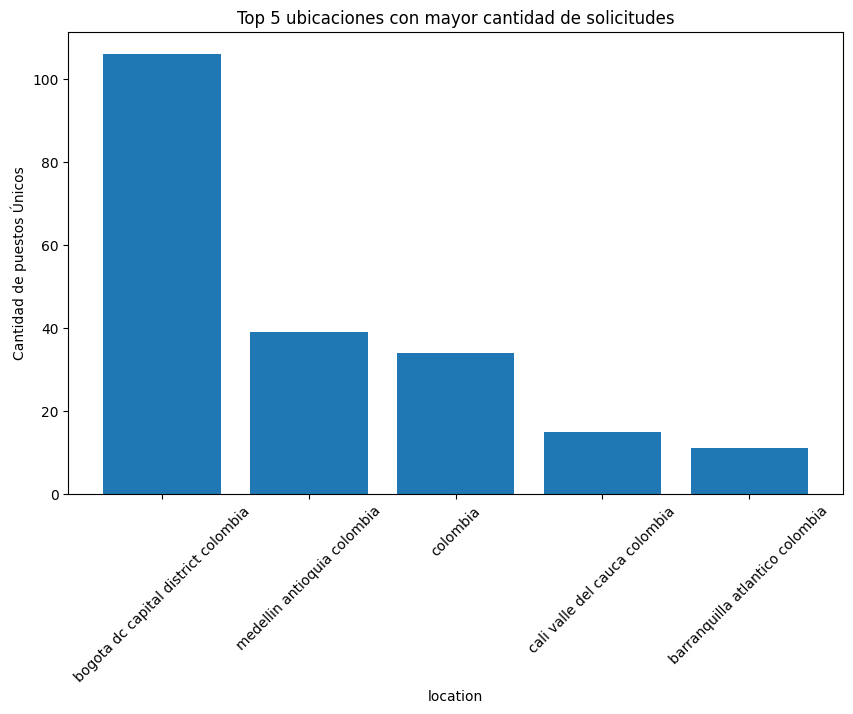

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_ubicacion['location'], top_5_ubicacion['title'])
plt.xlabel('location')
plt.ylabel('Cantidad de puestos Únicos')
plt.title('Top 5 ubicaciones con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Agrupar por empresas

In [52]:
df_por_empresas = df.groupby('company')['title'].nunique().reset_index()
#df_por_empresas_computrabajo = df_computrabajo.groupby('location')['company'].nunique().reset_index()
#df_por_empresas_jobz = df_jobz.groupby('location')['company'].nunique().reset_index()

In [53]:
print(df_por_empresas)

                              company  title
0                         abcw global      1
1                  accenture colombia      2
2                  acierta headhunter      2
3                              ada sa      7
4                           agaval sa      1
..                                ...    ...
127   universidad catolica de oriente      1
128                            velaio      1
129  wfm informatica y tecnologia sas      2
130              world food programme      1
131                           xxxxxxx      1

[132 rows x 2 columns]


In [54]:
top_5_empresas = df_por_empresas.sort_values('title', ascending=False).head(5)

In [55]:
print(top_5_empresas)

                       company  title
14                 bancolombia     18
119     tecnologia informatica     14
40                  eglobal sa     14
12   banco agrario de colombia      8
3                       ada sa      7


- Presentación

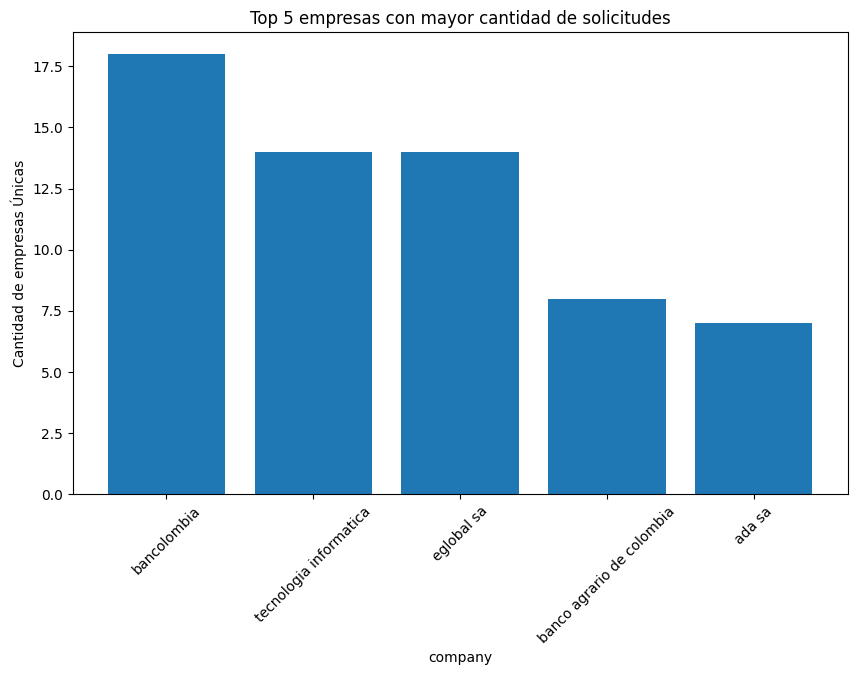

In [56]:
# Grafico de barras de las 5 empresas más demandantes
plt.figure(figsize=(10, 6))
plt.bar(top_5_empresas['company'], top_5_empresas['title'])
plt.xlabel('company')
plt.ylabel('Cantidad de empresas Únicas')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Mapa

In [57]:
# Inicializa el objeto geocoder de Google Maps
geolocator = GoogleV3(api_key=Keys.google_api_key)

def obtener_latitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None
    
def obtener_longitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None

In [58]:
top_5_ubicacion

location  title
4   bogota dc capital district colombia    106
26          medellin antioquia colombia     39
11                             colombia     34
6         cali valle del cauca colombia     15
2       barranquilla atlantico colombia     11

In [59]:
df['latitud'] = df['location'].apply(obtener_latitud)
df['longitud'] = df['location'].apply(obtener_longitud)

In [93]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in df.iterrows():
    ciudad = row['location']
    latitud = row['latitud']
    longitud = row['longitud']
    if ciudad in list(top_5_ubicacion['location']):
        colores='lightblue'
    else:  
        colores='black'
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color=colores)
    ).add_to(mapa)

#Imprimir mapa
mapa

### Categorias

In [63]:
#Se lee el df generado a partir del analisis del WebScraping, se toman de este solo los titulos y se conserva el formato Dataframe
df_Titles = df["title"].to_frame()

In [64]:
# assigning API KEY to initialize openai environment
openai.api_key = Keys.openai_api_key

In [65]:
response = openai.ChatCompletion.create(
  model="gpt-4-0613",
  messages=[
        {"role": "system", "content": "Hello"},
       {"role": "user", "content": f"""
        Te proporcionaré un dataframe: {df_Titles}, el cual contiene titulos de trabajos obtenidos mediante un proceso de WebScraping y un dataframe: {df_Categorias} con unas categorias potenciales basadas en los títulos de los trabajos obtenidos; tu trabajo será el de generar un JSON con clave (la categoria) y el valor deberá corresponder a la cantidad de titulos identificados y clasificados por ti para cada una de las categorias. solo responde con el JSON, NADA MAS."""}
    ]
)

#print(response['choices'][0]['message']['content'])

### Categorización de titulos

In [66]:
df_str = df_Titles.to_string(index = False)

In [67]:
df_str

'                                                                                                                                  title\n                                            aprendiz universitario en ingenieria de sistemas informatica estadistica o carreras afines \n                                                aprendiz universitario en ingenieria de sistemas ingenieria en ciencia de datos afines \n                                              aprendiz universitario en ingenieria de software ingenieria en analitica de datos afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                               aprendiz universitario en ingenieria de sistemas ingenieria informatica carreras afines \n                                        

In [68]:
#Tokenizar es para separar cada parte del archivo y crear una lista con cada sector.
token=word_tokenize(df_str)
token

['title',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'informatica',
 'estadistica',
 'o',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'en',
 'ciencia',
 'de',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'software',
 'ingenieria',
 'en',
 'analitica',
 'de',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'en',
 'ingenieria',
 'de',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'tecnico',
 'en',
 'sistemas',
 'o',
 'informatica',
 'con',
 'o',
 's

#### Stop words

In [69]:
a=set(stopwords.words("spanish"))

stopwords=[x for x in token if x not in a]

In [70]:
stopwords

['title',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'informatica',
 'estadistica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'ciencia',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'software',
 'ingenieria',
 'analitica',
 'datos',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'carreras',
 'afines',
 'tecnico',
 'sistemas',
 'informatica',
 'experiencia',
 'laboral',
 'aprendiz',
 'universitario',
 'ingenieria',
 'sistemas',
 'ingenieria',
 'informatica',
 'afines',
 'aprendiz',
 'universitario',
 '

In [71]:
#Encontrar la frecuencia de valores en un nombre_archivoo
from nltk.probability import FreqDist
fdist = FreqDist(stopwords)
fdist

FreqDist({'ingenieria': 1115, 'sistemas': 851, 'analista': 628, 'aprendiz': 607, 'informatica': 588, 'universitario': 572, 'afines': 544, 'tecnologia': 527, 'carreras': 441, 'pasantia': 378, ...})

In [72]:
fdist10 = fdist.most_common(10)
fdist10
#Crea una toppla con las palabras con mayor frecuencia

[('ingenieria', 1115),
 ('sistemas', 851),
 ('analista', 628),
 ('aprendiz', 607),
 ('informatica', 588),
 ('universitario', 572),
 ('afines', 544),
 ('tecnologia', 527),
 ('carreras', 441),
 ('pasantia', 378)]

In [73]:
stopwords = re.sub(r'[^\w\s]','',str(stopwords))

In [74]:
#te dice si es un verbo, sustantivo, pronombre
tex = word_tokenize(str(stopwords))
for token in tex:
  print(nltk.pos_tag([token]))

[('title', 'NN')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('informatica', 'NN')]
[('estadistica', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('ciencia', 'NN')]
[('datos', 'NN')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('software', 'NN')]
[('ingenieria', 'NNS')]
[('analitica', 'NN')]
[('datos', 'NN')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('informatica', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', 'NN')]
[('ingenieria', 'NNS')]
[('informatica', 'NN')]
[('carreras', 'NNS')]
[('afines', 'NNS')]
[('aprendiz', 'NN')]
[('universitario', 'NN')]
[('ingenieria', 'NNS')]
[('sistemas', '

### Descarga del dataframe final

In [75]:
df.to_csv("./Resultados/df_final.csv", index=False, mode="w")

### Nube

In [76]:
# Convertir el FreqDist en un diccionario
dict_freq = dict(fdist)

# Obtener las claves (primera columna)
primera_columna = list(dict_freq.keys())
primera_columna.remove("Title")
nube = str(primera_columna)

ValueError: list.remove(x): x not in list

In [ ]:
wc = WordCloud(font_path='/ruta/a/la/fuente/que/deseas/utilizar.ttf')

#wc=WordCloud()
#wc.generate(nube)
wc.to_file('output.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto para la nube de palabras (reemplaza 'nube' con tus datos)

# Configura la fuente que deseas utilizar
font_path = '/usr/share/fonts/truetype/noto/NotoSansTelugu-CondensedThin.ttf'

# Crea un objeto WordCloud
wc = WordCloud(font_path=font_path, background_color='white')

# Genera la nube de palabras
wc.generate(nube)

# Muestra la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Guarda la nube de palabras en un archivo de imagen
wc.to_file("output.png")

# Muestra la imagen
plt.show()
